# Higher-order ANOVA Models


## The Higher-order ANOVA Framework

### Terminology and Mean Tables

### Cell Means and Marginal Means


```{admonition} Higher-order terminology
:class: tip
... For instance, the most basic higher-order ANOVA is the two-way ANOVA, that contains two factors. IF each factor had two levels, we would write this as a $2 \times 2$ ANOVA. If the second factor had three levels, we would call it a $2 \times 3$ ANOVA. If there were *three* factors, we would have a three-way ANOVA. If each factor had two levels we could call it a $2 \times 2 \times 2$ ANOVA, and so on.
```

## The Additive Model
Let us start with the simplest approach, which is to just add another factor to the model. In terms of notation, this is a basic extension of what we already known

$$
y_{ijk} = \mu + \alpha_{i} + \beta_{j} + \epsilon_{ijk},
$$

where $\alpha_{i}$ is the effect associated with Factor A and $\beta_{j}$ is the effect associated with Factor B. The most basic form of this model would be one that represents a $2 \times 2$ design, with $i = 1,2$ and $j = 1,2$.

It is important to recognise at this point the assumptions that this model makes. If we stick with a $2 \times 2$ design then we have 4 cell means 

|                       | Factor B: Level 1 | Factor B: Level 2 | 
|-----------------------|-------------------|-------------------|
| **Factor A: Level 1** | $\mu_{11}$        | $\mu_{12}$        |
| **Factor A: Level 2** | $\mu_{21}$        | $\mu_{22}$        |

and thus 4 unique predicted values formed from:

$$
\begin{alignat*}{1}
    \mu_{11} &= \mu + \alpha_{1} + \beta_{1} \\
    \mu_{21} &= \mu + \alpha_{2} + \beta_{1} \\
    \mu_{12} &= \mu + \alpha_{1} + \beta_{2} \\
    \mu_{22} &= \mu + \alpha_{2} + \beta_{2}. 
\end{alignat*}
$$

Although probably not immediately obvious, this model assumes that the difference between the levels of each factor is the *same*, irrespective of the levels of the other factor. In other words, the model assumes a *constant* difference between the rows or the columns of the means table. For instance, the two differences between the 1st and 2nd levels of Factor A are

$$
\begin{alignat*}{2}
    \mu_{11} - \mu_{21} &= \left(\mu + \alpha_{1} + \beta_{1}\right) - \left(\mu + \alpha_{2} + \beta_{1}\right) &&= \alpha_{1} - \alpha_{2} \\
    \mu_{12} - \mu_{22} &= \left(\mu + \alpha_{1} + \beta_{2}\right) - \left(\mu + \alpha_{2} + \beta_{2}\right) &&= \alpha_{1} - \alpha_{2}
\end{alignat*}
$$

As such, no matter the level of Factor B, $\alpha_{1} - \alpha_{2}$ is always the same. The same is true across the levels of Factor A, where $\beta_{1} - \beta_{2}$ is always the same. In other words, this model make the strong assumption that the two factors are entirely *independant* and do not affect each other in any way. 

It is important to recognise that this assumption of additivity is actually a *constraint* on the fitting procedure. By specifying the model in this fashion, either least-squares or maximum likelihood will produce estimated means that adhere to additivity. The estimated cell means will therefore have a constant difference between the rows and the columns of the table. However, if this assumption is not true, the estimated cell means and the sample cell means will be *different*. The degree to which the model does not fit the actual sample means is therefore indicative of the degree to which the additivity assumption does not hold. We will see this in the example below and will be the starting point for justifying the concept of an *interaction* a little later.

```{admonition} Grounding ANOVA Examples
:class: tip
It can be difficult to conceptualise what an ANOVA model is saying when working in abstract terms such as "Factor A" or $\mu_{12}$. Often, it is useful to have a concrete example to drive the point home. For instance, imagine that Factor A is *depression diagnosis* with two levels: *depressed* and *non-depressed*. Now imagine that Factor B is *anxiety status* with two levels: *high-anxiety* and *low-anxiety*. Our $2 \times 2$ table of means would be

|                   | Depression: Non-depressed   | Depression: Depressed   | 
|-------------------|-----------------------------|-------------------------|
| **Anxiety: Low**  | Low-anxiety, Non-depressed  | Low-anxiety, Depressed  |
| **Anxiety: High** | High-anxiety, Non-depressed | High-anxiety, Depressed |


Remembering that the additive model assumes a *constant row difference* and a *constant column difference*, this is the same as assuming that the difference between those with and without depression is the same, irrespective of their anxiety (constant *column* difference). Similarly, this is the same as assuming that the difference between those with high and low anxiety is the same, irrespective of whether they are depressed (constant *row* difference). Of course, this depends entirely on what our outcome measure actually is. However, in the real world, it would seem unlikely that depression and anxiety are two completely independant conditions that do not influence each other in any way.
```

### Additive Model Example in `R`
As an example, let us expand our `mtcars` analysis with an addition categorical predictor. Within `mtcars` there already exists a factor called `vs` which indicates whether the engine is V-shaped or straight[^engine-foot]. This is already coded as a dummy variable, but we will label it so that it is clearer what it means before turning it into a factor.

In [34]:
data(mtcars)
mtcars$origin <- c('Other','Other','USA','USA','USA','USA','USA','Other','Other','Other',
                   'Other','Other','Other','Other','USA','USA','USA','Other','Other',
                   'Other','Other','USA','USA','USA','USA','Other','Other','Other',
                   'USA','Other','Other','Other')
mtcars$origin <- as.factor(mtcars$origin)

In [35]:
vs.lab <- rep("",length(mtcars$vs)) 
vs.lab[mtcars$vs == 0] <- "V-shaped"
vs.lab[mtcars$vs == 1] <- "Straight"

mtcars$vs <- as.factor(vs.lab)
print(levels(mtcars$vs))

[1] "Straight" "V-shaped"


We will also work with the simpler version of `origin`, where we only had 2 levels: `USA` and `Other`. Our table of means is therefore

|                   | VS: Straight | VS: V-shaped | 
|-------------------|--------------|--------------|
| **Origin: Other** | $\mu_{11}$   | $\mu_{12}$   |
| **Origin: USA**   | $\mu_{21}$   | $\mu_{22}$   |

So, $\mu_{11}$ will indicate `(Other,Straight)`, $\mu_{21}$ will indicate `(USA,Straight)` and so on. 

We can now examine how `R` has coded both `vs` and `origin` as dummy variables.

In [36]:
print(contrasts(mtcars$origin))
print(contrasts(mtcars$vs))

      USA
Other   0
USA     1
         V-shaped
Straight        0
V-shaped        1


So there are now 4 unique combinations of dummy values that lead to the 4 cell means

$$
\begin{alignat*}{2}
    \mu_{11} &= \beta_{0} + (\beta_{1} \times \mathbf{0}) + (\beta_{2} \times \mathbf{0}) = \beta_{0} &&\quad\texttt{(Other,Straight)} \\
    \mu_{21} &= \beta_{0} + (\beta_{1} \times \mathbf{1}) + (\beta_{2} \times \mathbf{0}) = \beta_{0} + \beta_{1} &&\quad\texttt{(USA,Straight)} \\
    \mu_{12} &= \beta_{0} + (\beta_{1} \times \mathbf{0}) + (\beta_{2} \times \mathbf{1}) = \beta_{0} + \beta_{2} &&\quad\texttt{(Other,V-shaped)} \\
    \mu_{22} &= \beta_{0} + \underbrace{(\beta_{1} \times \mathbf{1})}_{\texttt{origin}} + \underbrace{(\beta_{2} \times \mathbf{1})}_{\texttt{vs}} = \beta_{0} + \beta_{1} + \beta_{2} &&\quad\texttt{(USA,V-shaped)}\\
\end{alignat*}
$$

Based on this, we can work out that

| Parameter   | Meaning                                               | Interpretation           |
|-------------|-------------------------------------------------------|--------------------------|
| $\beta_{0}$ | Mean of `(Other,Straight)` cell                       | Reference cell           |
| $\beta_{1}$ | Mean difference `(USA,Straight) - (Other,Straight)`   | Constant *column* effect |
| $\beta_{2}$ | Mean difference `(Other,V-shaped) - (Other,Straight)` | Constant *row* effect    |

This also helps make sense of how the model prediction works. If we start at the reference cell ($\beta_{0} = \mu_{11}$) and then add the *row effect* ($\beta_{1}$) we move *down* a row and end up at $\mu_{21}$. Instead, if we start at the reference cell ($\beta_{0} = \mu_{11}$) and then add the *column effect* ($\beta_{2}$) we move *across* a column and end up at $\mu_{12}$. Finally, if we start at the reference cell ($\beta_{0} = \mu_{11}$) and then add the *row effect* ($\beta_{1}$) and the *column effect* ($\beta_{2}$) we move down a row and across a column and end up at $\mu_{22}$. 

```{warning}
Note that the ability to determine the cell means in this way only works because of the *additive assumptions* about contant row and column effects. If the cell means did not adhere to this, then you could not move up/down or left/right across the table of means freely, because the row/column effects would change depending upon which cell you started in. Under the additive model, it does not matter where you start because the differences are always the same.
```

Given all this, we can now see how `R` fits this model and check that it aligns with our understanding

In [37]:
add.mod <- lm(mpg ~ origin + vs, data=mtcars)
print(summary(add.mod))


Call:
lm(formula = mpg ~ origin + vs, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7035 -3.2079  0.1795  1.9298  8.3965 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.504      1.157  22.036  < 2e-16 ***
originUSA     -4.416      1.587  -2.783  0.00939 ** 
vsV-shaped    -6.433      1.571  -4.094  0.00031 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.139 on 29 degrees of freedom
Multiple R-squared:  0.5588,	Adjusted R-squared:  0.5283 
F-statistic: 18.36 on 2 and 29 DF,  p-value: 7.044e-06



Based on this, we can construct the estimated cell means

In [38]:
beta <- coef(add.mod)

# fitted cell means
mu.other.straight <- beta[1]
mu.USA.straight   <- beta[1] + beta[2]
mu.other.vshaped  <- beta[1] + beta[3]
mu.USA.vshaped    <- beta[1] + beta[2] + beta[3]

# means table
means.tbl <- data.frame("origin.other"=c(mu.other.straight,mu.other.vshaped),
                        "origin.USA"  =c(mu.USA.straight,  mu.USA.vshaped),
                        row.names=c("vs.straight","vs.vshaped"))

print(means.tbl)

            origin.other origin.USA
vs.straight     25.50350   21.08716
vs.vshaped      19.07019   14.65385


As expected, these fitted values have a constant difference between each row[^unname-foot]

In [39]:
print(unname(mu.other.straight - mu.other.vshaped))
print(unname(mu.USA.straight   - mu.USA.vshaped))

[1] 6.433314
[1] 6.433314


and a constant difference between each column

In [40]:
print(unname(mu.other.straight - mu.USA.straight))
print(unname(mu.other.vshaped  - mu.USA.vshaped))

[1] 4.416336
[1] 4.416336


Unfortunately, these estimated means do not match the actual sample means

In [41]:
# sample cell means
mu.other.straight <- mean(mtcars$mpg[mtcars$origin == "Other" & mtcars$vs == "Straight"])
mu.USA.straight   <- mean(mtcars$mpg[mtcars$origin == "USA"   & mtcars$vs == "Straight"])
mu.other.vshaped  <- mean(mtcars$mpg[mtcars$origin == "Other" & mtcars$vs == "V-shaped"])
mu.USA.vshaped    <- mean(mtcars$mpg[mtcars$origin == "USA"   & mtcars$vs == "V-shaped"])

# means table
means.tbl <- data.frame("origin.other"=c(mu.other.straight,mu.other.vshaped),
                        "origin.USA"  =c(mu.USA.straight,  mu.USA.vshaped),
                        row.names=c("vs.straight","vs.vshaped"))

print(means.tbl)

            origin.other origin.USA
vs.straight     25.59091   20.76667
vs.vshaped      18.95000   14.75000


Now, these are not too far off, so there are a few possibilities here. Firstly, it could be that the assumptions of the additive model do not hold in this example. Alternatively, it is possible that these effects are truly additive in the population and any deviation is simply sampling noise. Or, it could be that the degree to which these two factors influence each other is very minor and that we could treat these factors as additive for the sake of simplicity. We will come back to all this when we explore the Full Factorial model below. Firstly, we need to discuss the ANOVA omnibus main effects in a $2 \times 2$ design.

### Main Effects
In the previous part of this lesson, we discussed the concept of an *omnibus test* as an overall reflection of whether any of the mean differences across the levels of a categorical predictor are large. This idea carries-over into higher-order ANOVA models, with the main difference being that our null models are rarely intercept-only. Instead, we include all other factors in the null model *except* the factor of interest. The logic is that the additional factors may relate to the outcome variable and thus should be included in the null model. This is so that the error is as accurate as possible and does not accidentally contain any sources of systematic variation which would make it larger than it should be. Another way of thinking about this is that the omnibus null for one variable is not based on assuming that there are *no relationships with any other variables*. As such, the null model simply involves removing a *single variable*, not all of them[^reganova-foot].

```{admonition} Main Effects Definition
:class: tip
Within the context of an ANOVA, the omnibus effect of a single categorical predictor is known as a *main effect*. Under additivity, this reflects the omnibus effect of a single factor, ignoring all other factors in the model. For instance, what is the effect of `origin`, irrespective of whether an engine is `straight` or `v-sahped`? Or, what is the effect of *depression*, irrespective of whether someone is *highly-anxious* or not? Main effects *require* additivity to be interpretable and are based on comparing *marginal means* for the factor of interest.
```

Based on everything above, the *main effect* of Factor A is equivalent to the following model comparison

$$
\begin{alignat*}{2}
    \mathcal{M}_{0} &: y_{jk}  &&= \mu + \beta_{j} + \epsilon_{jk} \\
    \mathcal{M}_{1} &: y_{ijk} &&= \mu + \alpha_{i} + \beta_{j} + \epsilon_{ijk},
\end{alignat*}
$$

and the main effect of Factor B is equivalent to the following model comparison

$$
\begin{alignat*}{2}
    \mathcal{M}_{0} &: y_{ik}  &&= \mu + \alpha_{i} + \epsilon_{ik} \\
    \mathcal{M}_{1} &: y_{ijk} &&= \mu + \alpha_{i} + \beta_{j} + \epsilon_{ijk}.
\end{alignat*}
$$

In each case, we simply remove the terms associated with the factor of interest and see whether the change in the residual sums-of-squares is large relative to the error. This is then equivalent to comparing all the *marginal means* associated with a single factor. In the case of a $2 \times 2$ design, the omnibus null for these factors would be

$$
\begin{alignat*}{1}
    \mathcal{H}_{0}^{\text{A}} &: \mu_{1.} = \mu_{2.} \\
    \mathcal{H}_{0}^{\text{B}} &: \mu_{.1} = \mu_{.2} \\
\end{alignat*}
$$

Under additivity, the differences between the marginal means are *identical* to the constant row or column difference and thus directly capture the overall differences between the levels of a single factor, irrespective or the levels of the other factors in the model. When additivity does not hold, this logic breaks down as the marginal means may not longer capture any effects that reflect the actual data. We will see this later when we discuss *interactions*.

#### Main Effects in `R`
As we saw previously, we can form omnibus tests from explicit model comparisons using the `anova()` function. Using this method, the main effect of `origin` would be

In [42]:
null.mod <- lm(mpg ~ vs,          data=mtcars)
full.mod <- lm(mpg ~ origin + vs, data=mtcars)

print(anova(null.mod,full.mod))

Analysis of Variance Table

Model 1: mpg ~ vs
Model 2: mpg ~ origin + vs
  Res.Df    RSS Df Sum of Sq      F   Pr(>F)   
1     30 629.52                                
2     29 496.86  1    132.66 7.7428 0.009386 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


and the main effect of `vs` would be

In [43]:
null.mod <- lm(mpg ~ origin,      data=mtcars)
full.mod <- lm(mpg ~ origin + vs, data=mtcars)

print(anova(null.mod,full.mod))

Analysis of Variance Table

Model 1: mpg ~ origin
Model 2: mpg ~ origin + vs
  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1     30 784.06                                  
2     29 496.86  1     287.2 16.763 0.0003096 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Or, we could simply give the full model to the `Anova()` function from the `car` package and the model comparisons would be conducted automatically

In [44]:
library(car)
print(Anova(full.mod))

Anova Table (Type II tests)

Response: mpg
          Sum Sq Df F value    Pr(>F)    
origin    132.66  1  7.7428 0.0093864 ** 
vs        287.20  1 16.7628 0.0003096 ***
Residuals 496.86 29                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Compare the `Anova()` output with the outputs from the model comparisons to reassure yourself that these are *identical*. Importantly, notice that generating the full ANOVA table using `anova()` gives us a *different* answer for the effect of `origin`.

In [45]:
print(anova(full.mod))

Analysis of Variance Table

Response: mpg
          Df Sum Sq Mean Sq F value    Pr(>F)    
origin     1 341.99  341.99  19.961 0.0001110 ***
vs         1 287.20  287.20  16.763 0.0003096 ***
Residuals 29 496.86   17.13                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


We will discuss the reasons why in the final lesson of this unit. For now, this should hopefully convince you to always use `Anova()` instead of `anova()`, as the results are not always equivalent.

## The Full Factorial Model
So far, we have looked at the additive model that assumes a constant row and column difference between the cell means. However, as alluded to earlier, this additive assumption may not always hold. Indeed, in many real-world examples, we *expect* the factors in the model to influence each other. A good example of this would be a basic $2 \times 2$ model of a clinical trial. If Factor A is *diagnosis* (*patient*, *control*) and Factor B is *drug* (*placebo*, *medication*), then the expectation might be that the effect of the drug (i.e. *medication vs placebo*) is different depending upon whether you are a *control* or a *patient*. For instance, if the drug is very targeted then there may only be a difference between the medication and a placebo if you are patient, but not if you are a control. In this example, the effect of *drug* depends upon *diagnosis*. When *diagnosis = control* there is no effect, but when *diagnosis = patient* there is an effect. This form of dependence between the levels of multiple factors is known as an *interaction*.

### Interactions as Multiplicative Effects
So, given what we have described above, how do we accommodate an interaction into the additive model? To see this most clearly, we will start from first principles in order to build-up what an interaction *actually* is. To do so, we will briefly return to a more traditional multiple regression model with two variables

$$
y_{i} = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \epsilon_{i}.
$$

To make the logic easier to follow, we will rename $\beta_{2} \rightarrow \gamma$. This may seem unnecessarily confusing, but just stick with it for the moment. So, the model we are using has the form 

$$
y_{i} = \beta_{0} + \beta_{1}x_{i1} + \gamma x_{i2} + \epsilon_{i}.
$$

If it were the case that $x_{i1}$ and $x_{i2}$ were *dependent*, then the additive assumption fails and the effect associated with $x_{i2}$ (which we have named $\gamma$) is actually *related* to $x_{i1}$ in some fashion. We can write this dependence as *another* regression equation of the form

$$
\gamma = \beta_{2} + \beta_{3}x_{i1}.
$$

So, here, $\beta_{2}$ represents the *independent* part of the relationship between $x_{i1}$ and $x_{i2}$, and $\beta_{3}$ represents the *dependent* part of the relationship (hence why $x_{i1}$ is there). If we insert this new definition of $\gamma$ into the original regression equation, we get

$$
y_{i} = \beta_{0} + \beta_{1}x_{i1} + (\underbrace{\beta_{2} + \beta_{3}x_{i1}}_{\gamma})x_{i2} + \epsilon_{i}.
$$

If we now remove the brackets, we arrive at the final model

$$
y_{i} = \beta_{0} + \underbrace{\beta_{1}x_{i1} + \beta_{2}x_{i2}}_{\text{additive model}} + \underbrace{\beta_{3}x_{i1}x_{i2}}_{\text{interaction}} + \epsilon_{i}.
$$

So what is an interaction? In modelling terms, it is the effect associated with the *multiplication* of predictor variables. Hence, an interaction effect is often termed a *multiplicative* effect, rather than an *additive* effect. If you want more intution behind this, have a look at the drop-down below.

```{admonition} Multiplication Intuition
:class: tip, dropdown
It may not be immediately clear why multiplying two variables together would give you an interaction effect. The trick here is understanding that multiplying the values of two variables produces a *new* variable whose value combines the effect of both individual variables together. This can be thought of as *scaling* one variable by the other. ...
```

### The Full Factorial ANOVA
In terms of translating the regression model above into an ANOVA that contains an interaction term, we simply use a similar convention to previous models and express it as

$$
y_{ijk} = \mu + \alpha_{i} + \beta_{j} + (\alpha\beta)_{ij} + \epsilon_{ijk}.
$$

Here, we have simply taken the additive model and included an additional *interaction effect*, which is denoted $(\alpha\beta)_{ij}$. This makes it clear that this is the *multiplicative* effect of Factor A and Factor B. Indeed, we might typically refer to this as the $A \times B$ interaction effect.

In [46]:
print(contrasts(mtcars$origin))
print(contrasts(mtcars$vs))
print(contrasts(mtcars$origin) * contrasts(mtcars$vs))

      USA
Other   0
USA     1
         V-shaped
Straight        0
V-shaped        1
      USA
Other   0
USA     1


$$
\begin{alignat*}{3}
    \mu_{11} &= \beta_{0} + (\beta_{1} \times \mathbf{0}) + (\beta_{2} \times \mathbf{0}) + (\beta_{3} \times \mathbf{0}) &&= \beta_{0} &&\quad\texttt{(Other,Straight)} \\
    \mu_{21} &= \beta_{0} + (\beta_{1} \times \mathbf{1}) + (\beta_{2} \times \mathbf{0}) + (\beta_{3} \times \mathbf{0}) &&= \beta_{0} + \beta_{1} &&\quad\texttt{(USA,Straight)} \\
    \mu_{12} &= \beta_{0} + (\beta_{1} \times \mathbf{0}) + (\beta_{2} \times \mathbf{1}) + (\beta_{3} \times \mathbf{0}) &&= \beta_{0} + \beta_{2} &&\quad\texttt{(Other,V-shaped)} \\
    \mu_{22} &= \beta_{0} + \underbrace{(\beta_{1} \times \mathbf{1})}_{\texttt{origin}} + \underbrace{(\beta_{2} \times \mathbf{1})}_{\texttt{vs}} + \underbrace{(\beta_{3} \times \mathbf{1})}_{\texttt{origin * vs}} &&= \beta_{0} + \beta_{1} + \beta_{2} + \beta_{3} &&\quad\texttt{(USA,V-shaped)}\\
\end{alignat*}
$$

In [47]:
int.model <- lm(mpg ~ origin + vs + origin:vs, data=mtcars)
summary(int.model)


Call:
lm(formula = mpg ~ origin + vs + origin:vs, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-7.791 -3.031  0.200  2.050  8.309 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           25.5909     1.2693  20.161  < 2e-16 ***
originUSA             -4.8242     2.7421  -1.759  0.08945 .  
vsV-shaped            -6.6409     1.9562  -3.395  0.00207 ** 
originUSA:vsV-shaped   0.6242     3.3922   0.184  0.85532    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.21 on 28 degrees of freedom
Multiple R-squared:  0.5593,	Adjusted R-squared:  0.5121 
F-statistic: 11.84 on 3 and 28 DF,  p-value: 3.466e-05


Alternatively, we can use the `*` syntax to tell `R` to fit a full factorial model between these two explantory variables. By using `origin*vs`, this will automatically get expanded into all main effects and interactions. This can be especially helpful when you have a big model and want to include eveything, though knowing how to specify all effects explicitly is important because there may be times where you want to *exclude* some interactions, but not all. As an example, the full factorial shorthand for this model would be

In [48]:
int.model <- lm(mpg ~ origin*vs, data=mtcars)

### Interaction in Terms of Cell Means

In [49]:
beta <- coef(int.model)

# fitted cell means
mu.other.straight <- beta[1]
mu.USA.straight   <- beta[1] + beta[2]
mu.other.vshaped  <- beta[1] + beta[3]
mu.USA.vshaped    <- beta[1] + beta[2] + beta[3] + beta[4]

print((mu.other.straight - mu.USA.straight) - (mu.other.vshaped - mu.USA.vshaped))

(Intercept) 
  0.6242424 


Which is *precisely* the interaction effect given in the summary table above.

### The Omnibus Interaction Effect

In [50]:
null.mod <- lm(mpg ~ origin + vs,             data=mtcars)
full.mod <- lm(mpg ~ origin + vs + origin:vs, data=mtcars)

print(anova(null.mod,full.mod))

Analysis of Variance Table

Model 1: mpg ~ origin + vs
Model 2: mpg ~ origin + vs + origin:vs
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1     29 496.86                           
2     28 496.26  1   0.60021 0.0339 0.8553


In [51]:
print(Anova(full.mod))

Anova Table (Type II tests)

Response: mpg
          Sum Sq Df F value    Pr(>F)    
origin    132.66  1  7.4848 0.0106777 *  
vs        287.20  1 16.2043 0.0003925 ***
origin:vs   0.60  1  0.0339 0.8553211    
Residuals 496.26 28                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


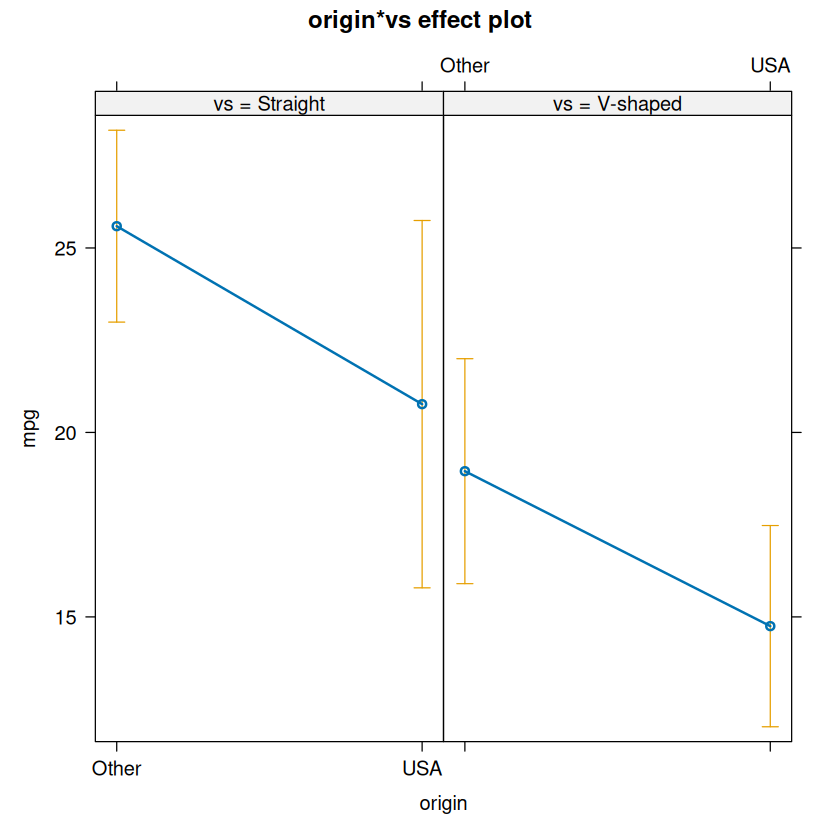

In [52]:
library(effects)
plot(effect("origin:vs", full.mod))

So, the interaction terms represents that "bit extra" that we need in order to allow the fitted means to be the same as the sample means. The additive model only gets us so far. The interaction terms allows for a cell-specific adjustment to shift the additive model means so that they are the actual cell means. The larger this adjustment, the larger the interaction effect. In other words, the more that effect of one factor depends upon the levels of the other. 

It is also worth noting that many statisticians recommend removing any non-significant interaction effects from the model before proceeding. However, this is not typically done in Psychology. Instead, due to the prevalence of NHST, these effects are simply assessed based on their significance and interpreted accordingly. This is largely because the focus of many statisticians is building the best model they can, whereas the focus in Psychology is largely about hypothesis tests.

```{admonition} Interaction Definition
:class: tip
Within the context of an ANOVA, the omnibus interaction effect ...
```

### The Omnibus Main Effect Tests
When the model contains interaction effects, we need to be more careful about how we define main effects.

...



#### Interpreting Main Effects in the Presence of an Interaction



#### Type II Effects

This gets a little tricky, but we will discuss more about Type I, Type II and Type III tests in the final lesson on this unit. For now, just know that Type II main effects are calculated based on assuming that the interaction effect is 0. In other words, they are calculated as if the additive model were true[^type2-foot]. 

Why would we want to do this? Well, consider the two situations we may find ourselves in:

1. The interaction effect is significant
    - In this case, we know that the main effects are not meaningful and so should be ignored anyway. We would simply focus on the interaction effect and interpret it.
2. The interaction effect is *not* significant
    - In this case, the additive model is the most suitable and we should interpret main effects as if the additive model were true.

As we can see, the Type II tests allow for both these situations. If the interaction is significant, the main effects are meaningless anyway so should be ignored. If the interaction is non-significant, the additive model is preferred and the Type II main effects are then the form that we want.

In [53]:
# Numerator from ADDITIVE MODELS
null.mod <- lm(mpg ~ vs,          data=mtcars)
full.mod <- lm(mpg ~ origin + vs, data=mtcars)
null.RSS <- sum(resid(null.mod)^2)
full.RSS <- sum(resid(full.mod)^2)
SS.B     <- null.RSS - full.RSS

# Denominator from FULL FACTORIAL MODEL
full.mod.2 <- lm(mpg ~ origin + vs + origin:vs, data=mtcars)
SS.W       <- sum(resid(full.mod.2)^2)

# Mean-squares
df.1 <- 1                      # k - 1
df.2 <- full.mod.2$df.residual # n - p
MS.B <- SS.B / df.1            # reduction in error variance (effect)
MS.W <- SS.W / df.2            # remaining error variance (error)

# F-ratio
F <- MS.B / MS.W

# p-value from null F-distribution with df1 and df2
p <- pf(q=F, df1=df.1, df2=df.2, lower.tail=FALSE)

# Results
print(data.frame("F.ratio"=F, "p.value"=p), row.names=FALSE)

  F.ratio    p.value
 7.484841 0.01067766


### Interpreting Main Effects in the Presence of an Interaction
... We can see that averaging over either the rows or columns of the means table only makes sense when additivity is assumed. If we do this when there is not a constant row or column effect, the very meaning of the main effect breaks down. If we want to think of a main effect as the consistent effect of a factor irrespective of other factors, this is no longer valid when those effects are *not* consistent. As such, main effects must assume additivity to make any sense. If there is a large interaction effect, the very concept of a main effects no longer make sense. 

Indeed, you do not need to know anything about the model to see this. The interaction tells us that the main effect depends upon the level of another factor. Why would we then try to look at a main effect *ignoring* that factor? We know that other factor matters. That is what the interaction tells us. Unfortuantely, it is common practise in Psychology to ignore this and try to interpret main effects in the presence of significant interactions. Hopefully it is clear how meaningless this actually is.

[^engine-foot]: Not that it really matters for understanding an ANOVA, but a straight engine has cylinders in a straight line, while a V-shaped engine has two banks of cylinders arranged in a "V". V-shaped engines tend to be more compact and powerful. Straight engines are often more balanced, whereas V engines are shorter and can be better for performance-focused applications.

[^unname-foot]: All the `unname()` function is doing here is preventing `R` from printing any labels alongside these results and making them less clear. Sometimes, values carry labels with them across different calculations and you get some odd names, like `(Intercept)` being printed above the calculations. This stops that from happening. You can remove it, if you like, and see what happens.

[^reganova-foot]: If we want to remove *everything*, we can always use the regression ANOVA report at the bottom of the summary table, as mentioned at the end of the previous part of the lesson.

[^type2-foot]: Note that these tests are not identical to simply fitting an additive model, but this is a subtlety we will leave to one side for now.